In [68]:
import csv

original_data = []
with open('/home/kevin/weight-height.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
            #print(', '.join(row))
            original_data.append(row[0].split(","))
#print(original_data)
original_data.pop(0)

['""', '"sex"', '"weight"', '"height"', '"repwt"', '"repht"']

In [182]:
def Clear_data(data) : #вес(кг)/рост(м)^2 в районе 17-40 считается реалистичным
    delete_index_list = []
    for row in data :
        #row[0] = int(row[0].replace('"',""))
        for i in [2,3,4,5] :
            if row[i] != "NA" :
                row[i] = int(row[i])
        #print(row[0])
        if ((10000 * row[2])/(row[3]*row[3]) < 17) or ((10000 * row[2])/(row[3]*row[3]) > 35) :
            delete_index_list.append(row[0] - 1)
    delete_index_list.reverse()
    for i in delete_index_list : 
        #print((10000 * data[i][2])/(data[i][3]*data[i][3]))
        #print(data.pop(i))
        data.pop(i)
    return data

cleaned_data = Clear_data(original_data)


In [183]:
def Sort_data(data) :
    train_data = []
    test_data  = []
    was_the_last_M_sent_to_train = False
    was_the_last_F_sent_to_train = False
    for row in data :
        #print(row)
        #print(row[1])
        if row[1] == '"M"' :
            if was_the_last_M_sent_to_train == False :
                train_data.append(row)
                was_the_last_M_sent_to_train = True
            else :
                test_data.append(row)
                was_the_last_M_sent_to_train = False
        elif row[1] == '"F"' :
            if was_the_last_F_sent_to_train == False :
                train_data.append(row)
                was_the_last_F_sent_to_train = True
            else :
                test_data.append(row)
                was_the_last_F_sent_to_train = False        
        else : 
            print("???")
    return train_data, test_data

train_data =[]
test_data = []
train_data, test_data = Sort_data(cleaned_data)


In [187]:
from numpy import *
import numpy as np
import math
import matplotlib.pyplot as plt

train_data_height_M = []
train_data_height_F = []
train_data_weight_M = []
train_data_weight_F = []


train_data_rep_height_M = []
train_data_rep_height_F = []
train_data_rep_weight_F = []
train_data_rep_weight_M = []


r_train_data_height_M = []
r_train_data_weight_M = []
r_train_data_height_F = []
r_train_data_weight_F = []

for row in train_data :
    if row[1] == '"M"' :
        train_data_height_M.append(row[3])
        train_data_weight_M.append(row[2])
    else :
        train_data_height_F.append(row[3])
        train_data_weight_F.append(row[2])

for row in train_data :
    if row[4] != "NA" and row[5] != "NA" :
        if row[1] == '"M"' :
            r_train_data_height_M.append(row[3])
            r_train_data_weight_M.append(row[2])
        else :
            r_train_data_height_F.append(row[3])
            r_train_data_weight_F.append(row[2])

for row in train_data :
    if row[4] != "NA" and row[5] != "NA" :
        if row[1] == '"M"' :
            train_data_rep_height_M.append(row[5])
            train_data_rep_weight_M.append(row[4])
        else :
            train_data_rep_height_F.append(row[5])
            train_data_rep_weight_F.append(row[4])
    
F_bars_amount = np.arange(len(train_data_rep_height_F))
M_bars_amount = np.arange(len(train_data_rep_height_M))

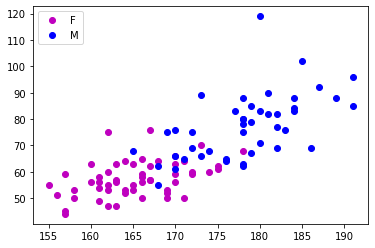

In [188]:
plt.plot(train_data_height_F,  train_data_weight_F, 'mo',label = "F")
plt.plot(train_data_height_M,  train_data_weight_M, 'bo',label = "M")
plt.legend(loc='upper left')
plt.show()

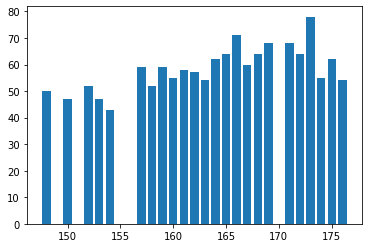

In [90]:
plt.bar(train_data_height_F,  train_data_weight_F)
plt.show()

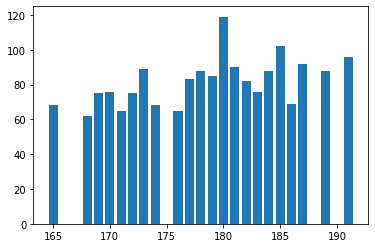

In [92]:
plt.bar(train_data_height_M,  train_data_weight_M)
plt.show()

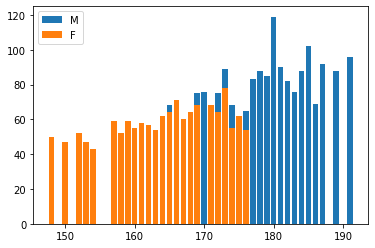

In [97]:
plt.bar(train_data_height_M,  train_data_weight_M, label = "M")
plt.bar(train_data_height_F,  train_data_weight_F, label = "F")
plt.legend(loc='upper left')
plt.show()

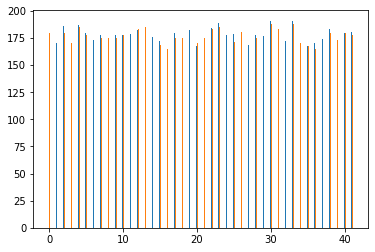

In [114]:
# train_data_rep_height_M
# train_data_rep_height_F 
# train_data_rep_weight_F
# train_data_rep_weight_M 
# F_bars_amount
# M_bars_amount
# r_train_data_height_M
# r_train_data_weight_M
# r_train_data_height_F
# r_train_data_weight_F
x = M_bars_amount

width = 0.1
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, r_train_data_height_M, width, label='Real')
rects2 = ax.bar(x + width/2, train_data_rep_height_M, width, label='Rep')
plt.show()

In [ ]:
import scipy

def count_woman(data) :
    count = 0
    for row in data :
        if row[1] == '"F"' :
            count+=1
    return count

def estimate_average(data, parameter, sex) :   #parameter = 2,3,4,5, sex "M" "F"
    sum = 0
    num = 0
    for row in data :
        if row[parameter]!= "NA" and row[1] == sex :
            sum+=row[parameter]
            num+=1
    return sum/num

def dispersion(data, parameter, sex) :   #parameter = 2,3,4,5, sex "M" "F"
    arr = []
    for row in data : 
        if row[parameter] != "NA" and row[1] == sex :
            arr.append(row[parameter])
    return p.std(array)**2

def generate_sex(chance) :
    if np.random.sample()<=chance :
        return 'woman'
    else :
        return 'man' 

In [201]:
class Point_Generator :
    def __init__(self):
        self.p_woman = None
        self.mean_height = {
            "woman" : None,
            "man" : None
        }
        self.mean_weight = {
            "woman" : None,
            "man" : None
        }
        self.covariance = {
            "woman" : None,
            "man" : None
        }
        
    def fit(self,train_data) :
        self.p_woman  = count_woman(train_data)/len(train_data)
        self.mean_height['woman'] = estimate_average(train_data, 3, '"F"')
        self.mean_weight['woman'] = estimate_average(train_data, 2, '"F"')
        self.mean_height['man']  = estimate_average(train_data, 3, '"M"')
        self.mean_weight['man']  = estimate_average(train_data, 2, '"M"')
        weight_arr_M = []
        height_arr_M = []
        weight_arr_F = []
        height_arr_F = []
        for row in train_data :
            if row[1] == '"F"' :
                weight_arr_F.append(row[2])
                height_arr_F.append(row[3])
            else : 
                weight_arr_M.append(row[2])
                height_arr_M.append(row[3])
        #print(weight_arr_F)
        #print(height_arr_F)
        self.covariance['woman'] = np.cov(weight_arr_F,height_arr_F)
        self.covariance['man'] = np.cov(weight_arr_M,height_arr_M)
        
        #print(self.mean_height['woman'])
        #print(self.covariance['woman'])
        #print(self.covariance['man'])
        
    def generate_points(self,point_amount) :
        result = [] 
        gen_weight = 0
        gen_height = 0
        for i in range(point_amount) :
            sex = generate_sex(self.p_woman)
            gen_weight, gen_height = np.random.default_rng().multivariate_normal\
            ([self.mean_weight[sex],self.mean_height[sex]],self.covariance[sex], 1).T
            result.append([i,sex,gen_weight[0],gen_height[0],"NA","NA"])
        return result    
    
    def log_likelyhood(self,data) :
        chance = 1
        for row in data :
            #print(row)
            sex = row[1]
            if sex == '"F"' :
                sex = 'woman'
            elif sex == '"M"' :
                sex = 'man'
            sex_chance = 0.5
            if sex == 'woman' :
                sex_chance = self.p_woman
            else :
                sex_chance = 1 - self.p_woman
            
            chance*= scipy.stats.multivariate_normal.logpdf([row[2],row[3]],
            mean=[pg.mean_weight[sex],pg.mean_height[sex]],cov=pg.covariance[sex])
            #print(scipy.stats.multivariate_normal.logpdf([row[2],row[3]],
            #mean=[pg.mean_weight[sex],pg.mean_height[sex]],cov=pg.covariance[sex]))
            #print("chance" + str(chance))
        return chance

    def mean_likelyhood(self,data) :
        return self.log_likelyhood(data) / len(data)
pg = Point_Generator()
pg.fit(train_data)
print(pg.mean_likelyhood(train_data))

7.192648522002559e+77


In [203]:
pg = Point_Generator()
pg.fit(train_data)
gen_data = pg.generate_points(100)

In [178]:
pg.fit(train_data)
pg.covariance

{'woman': array([[42.16632997, 21.9996633 ],
        [21.9996633 , 38.57373737]]),
 'man': array([[153.36575053,  44.86257928],
        [ 44.86257928,  39.62526427]])}

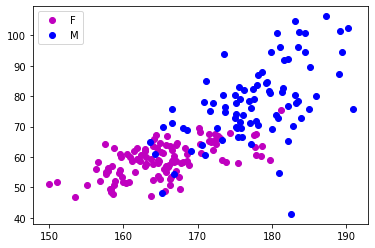

In [186]:
_train_data_height_M = []
_train_data_height_F = []
_train_data_weight_M = []
_train_data_weight_F = []

for row in gen_data :
    if row[1] == 'man' :
        _train_data_height_M.append(row[3])
        _train_data_weight_M.append(row[2])
    else :
        _train_data_height_F.append(row[3])
        _train_data_weight_F.append(row[2])
        
plt.plot(_train_data_height_F,  _train_data_weight_F, 'mo',label = "F")
plt.plot(_train_data_height_M,  _train_data_weight_M, 'bo',label = "M")
plt.legend(loc='upper left')
plt.show()

In [156]:
#var = [105.11736295687987, 175.34089688081048]
#scipy.stats.multivariate_normal.pdf(var,[pg.mean_weight['man'],pg.mean_height['man']],pg.covariance['man'])

In [206]:
pg_train = Point_Generator()
pg_test = Point_Generator()
pg_train.fit(train_data)
pg_test.fit(test_data)
gen_data1 = pg_train.generate_points(100)
gen_data2 = pg_test.generate_points(100)

In [207]:
print(pg.mean_likelyhood(train_data))
print(pg.mean_likelyhood(test_data))
print(pg.mean_likelyhood(gen_data1))
print(pg.mean_likelyhood(gen_data2))

7.192648522002559e+77
1.1369307485329059e+78
7.786575294972158e+79
3.3511651801383287e+80
